## Artificial Intelligence Assignment 2
## No8. Data Preprocessing
## 20132651 Sungjae Lee

In [3]:
import torch
from torch.utils.data import TensorDataset, DataLoader

In [7]:
 class TwoLayerNet(torch.nn.Module):
        def __init__(self, D_in, H, D_out):
            super(TwoLayerNet, self).__init__()
            self.linear1 = torch.nn.Linear(D_in, H)
            self.linear2 = torch.nn.Linear(H, D_out)
            
        def forward(self, x):
            h_relu = self.linear1(x).clamp(min = 0)
            y_pred = self.linear2(h_relu)
            return y_pred

In [8]:
N, D_in, H, D_out = 64, 1000, 100, 10

In [9]:
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [10]:
loader = DataLoader(TensorDataset(x, y), batch_size = 8)
model = TwoLayerNet(D_in, H, D_out)

In [11]:
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-2)

In [13]:
loss_list = []

for epoch in range(20):
    for x_batch, y_batch in loader:
        y_pred = model(x_batch)
        loss = torch.nn.functional.mse_loss(y_pred, y_batch)
        
        loss_list.append(loss.item())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [17]:
import matplotlib.pyplot as plt

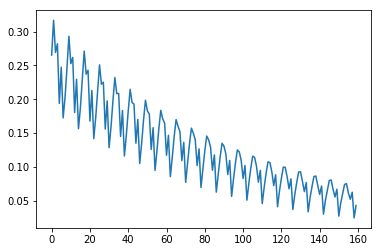

In [20]:
plt.plot(loss_list)
plt.show()